# SMAI PROJECT 


# Predicting students who are prone to dropping out based on various attributes 

In [26]:
import numpy as np 
import pandas as kfp
import seaborn as sb

In [3]:
data = kfp.read_csv('data.csv')

In [4]:
data.head()

,Unnamed: 0,GENDERID,SOCIALCATID,RELIGIONID,BPL_YN,DISADV_YN,FREEEDU_YN,ATTENDANCE,HOMELESS_YN,EXAMMARKS,DISABILITY_ID,DROPOUT
0,0,0,0,0,0,0,0,48,0,51,0,1
1,1,0,0,0,0,0,0,48,0,48,0,0
2,2,0,0,0,0,0,0,48,0,86,0,0
3,3,0,0,0,0,0,0,33,0,33,0,1
4,4,1,1,0,0,0,0,73,0,96,0,0


#### The various columns in the data set procured are 

In [5]:
list(data)`

['Unnamed: 0',
 'GENDERID',
 'SOCIALCATID',
 'RELIGIONID',
 'BPL_YN',
 'DISADV_YN',
 'FREEEDU_YN',
 'ATTENDANCE',
 'HOMELESS_YN',
 'EXAMMARKS',
 'DISABILITY_ID',
 'DROPOUT']

In [6]:
data.isnull().values.any()

False

#### Therefore we have confirmed that there are no null values in the cdv file

In [35]:
#data.duplicated(subset=None, keep='first')

#### Therefore there are no duplicate rows in the data

From the above checks it is confirmed that the data is cleaned. so we can start the data analysis. 

In [24]:
len(data)

17359

In [33]:
data.shape

(17359, 12)

number of rows in the data is 17359, which is what was mentioned for the cleaned data in the research paper. 

### We can drop the first column as it is just the index and has no correlatin with the output label 'DROPOUT'

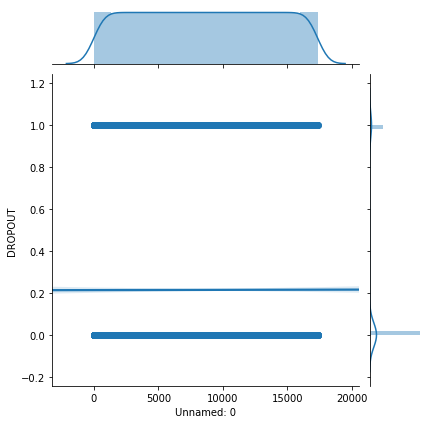

In [29]:
sb.jointplot(x=data['Unnamed: 0'],y=data['DROPOUT'], data=data, kind='reg')

The above graph verifies the no correlation 

In [38]:
data.drop(['Unnamed: 0'], axis=1)
temp = 0

## Checking for other attributes 

### 1. GENDERID

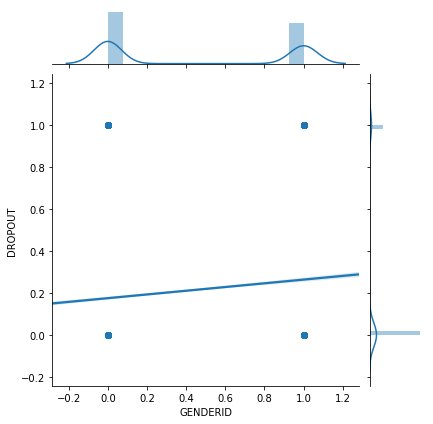

In [39]:
sb.jointplot(x=data['GENDERID'],y=data['DROPOUT'], data=data, kind='reg')

The line is not straight which means that there is a correlation b/w the GENDERID and DROPOUT

### 2.SOCIALCATID

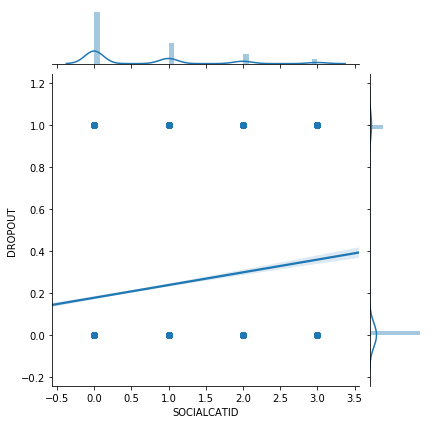

In [45]:
sb.jointplot(x=data['SOCIALCATID'],y=data['DROPOUT'], data=data, kind='reg')

The line is not straight which means that there is a correlation b/w the SOCIALCATID and DROPOUT

### 3.RELIGIONID

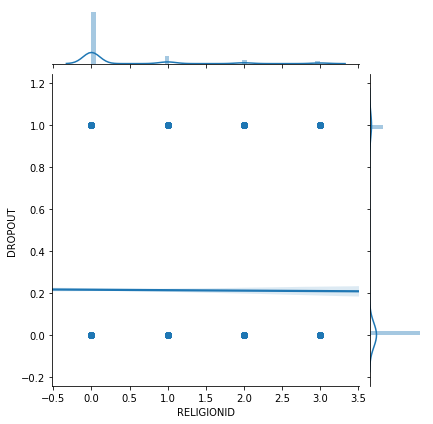

In [47]:
sb.jointplot(x=data['RELIGIONID'],y=data['DROPOUT'], data=data, kind='reg')

In [65]:
data1 = data[['RELIGIONID' ,'DROPOUT']]
count = 0
for i in data1:
    if((data1["RELIGIONID"]==0) and (data1["DROPOUT"]==0) ):
        count+=1
print(count)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

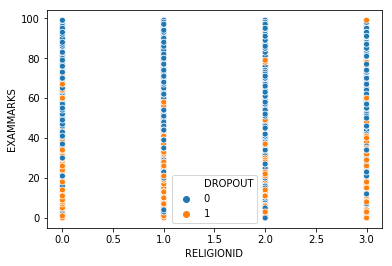

In [48]:
graph=sb.scatterplot(x="RELIGIONID",y="EXAMMARKS",hue="DROPOUT", data=data)

# TO DO : PLOT DROPOUT PERCENTAGES FOR ALL RELIGIONS 

### 4.BPL_YN

If the student is below the powerty line then this entry is 1, otherwise 0.

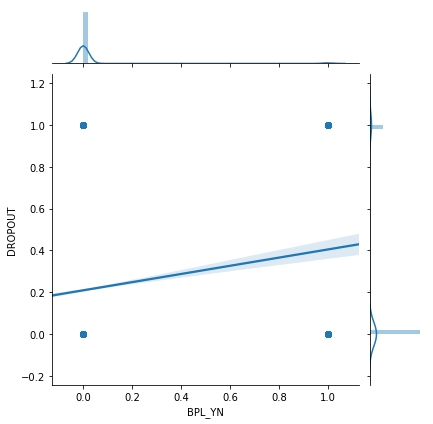

In [49]:
sb.jointplot(x=data['BPL_YN'],y=data['DROPOUT'], data=data, kind='reg')

This graph clearly shows that the probability of a student who is below powerty line dropping out is much more than a student who isnt.

### 5.DISADV_YN

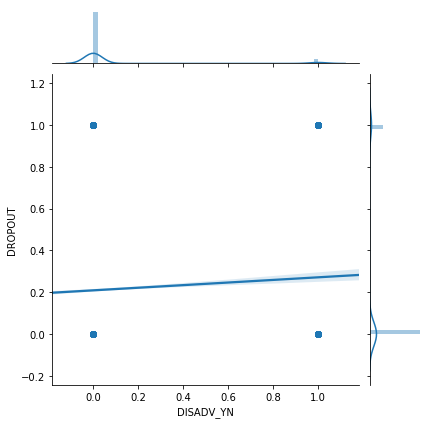

In [51]:
sb.jointplot(x=data['DISADV_YN'],y=data['DROPOUT'], data=data, kind='reg')

This graph clearly shows that the probability of a student who is disadvantaged dropping out is much more than a student who isnt.

### 6.FREEEDU_YN

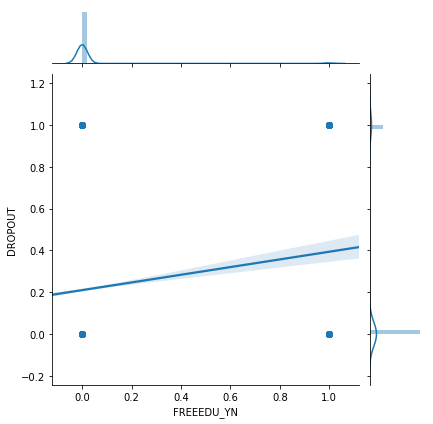

In [53]:
sb.jointplot(x=data['FREEEDU_YN'],y=data['DROPOUT'], data=data, kind='reg')

This graph clearly shows that the probability of a student who is disadvantaged dropping out is much more than a student who isnt.

### 7.ATTENDANCE

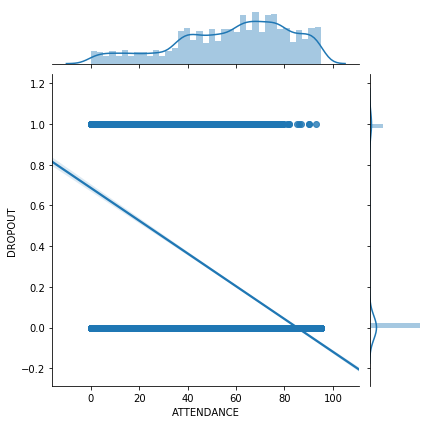

In [55]:
sb.jointplot(x=data['ATTENDANCE'],y=data['DROPOUT'], data=data, kind='reg')

There is an obvious trend of student dropout rate decreasing with increase in students attendance 

### 8.HOMELESS_YN

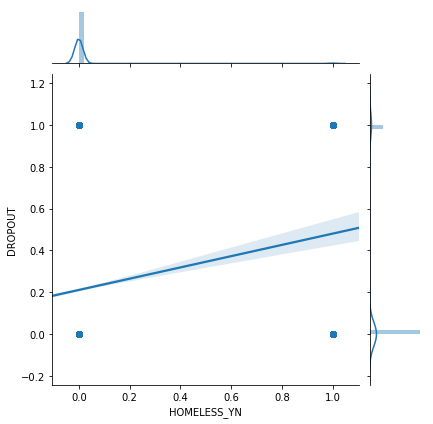

In [56]:
sb.jointplot(x=data['HOMELESS_YN'],y=data['DROPOUT'], data=data, kind='reg')

As expected, student droput rate is more for homelessstudents than those who are'nt

### 9.EXAMMARKS

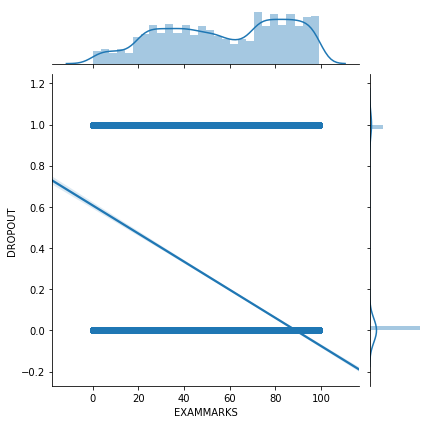

In [57]:
sb.jointplot(x=data['EXAMMARKS'],y=data['DROPOUT'], data=data, kind='reg')

 There is an obvious trend of student dropout rate decreasing with increase in student's marks

### 10.DISABILITY_ID

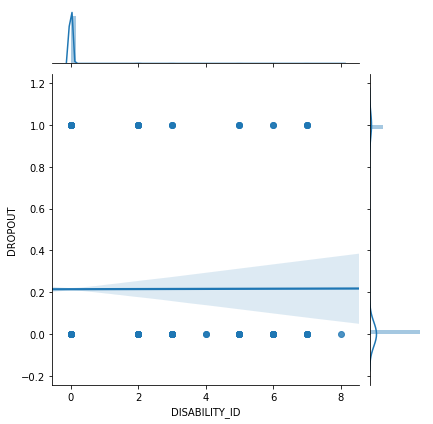

In [58]:
sb.jointplot(x=data['DISABILITY_ID'],y=data['DROPOUT'], data=data, kind='reg')

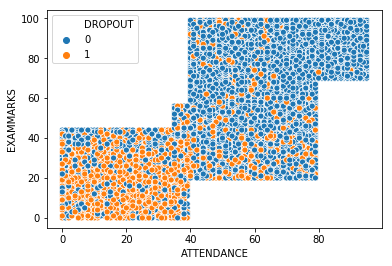

In [59]:
graph=sb.scatterplot(x="ATTENDANCE",y="EXAMMARKS",hue="DROPOUT", data=data)

This confirms that attendance and exammarks are very important in predicting student dropout